In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

n = 300

df = pd.DataFrame({
    "sample_id": [f"S{i:03d}" for i in range(n)],
    "group": np.random.choice(["control", "treated"], size=n, p=[0.5, 0.5]),
    "batch": np.random.choice(["B1", "B2"], size=n, p=[0.6, 0.4]),
    "age": np.random.normal(loc=55, scale=12, size=n)
})

# Expresión base
expression = np.random.normal(loc=10, scale=2.5, size=n)

# Efecto de grupo (treated un poco más alto)
expression += np.where(df["group"] == "treated", 1.2, 0)

# Batch effect (B2 ligeramente más alto)
expression += np.where(df["batch"] == "B2", 0.8, 0)

# Introducir ceros (5%)
zero_idx = np.random.choice(n, size=int(0.05 * n), replace=False)
expression[zero_idx] = 0

# Evitar negativos absurdos
expression = np.clip(expression, 0, None)

df["expression"] = expression
df["age"] = df["age"].round(1)

df.head()


,sample_id,group,batch,age,expression
0,S000,control,B1,48.6,7.626503
1,S001,treated,B1,45.5,17.780955
2,S002,treated,B1,53.7,12.433295
3,S003,treated,B2,42.6,12.462090
4,S004,control,B2,48.4,8.654106


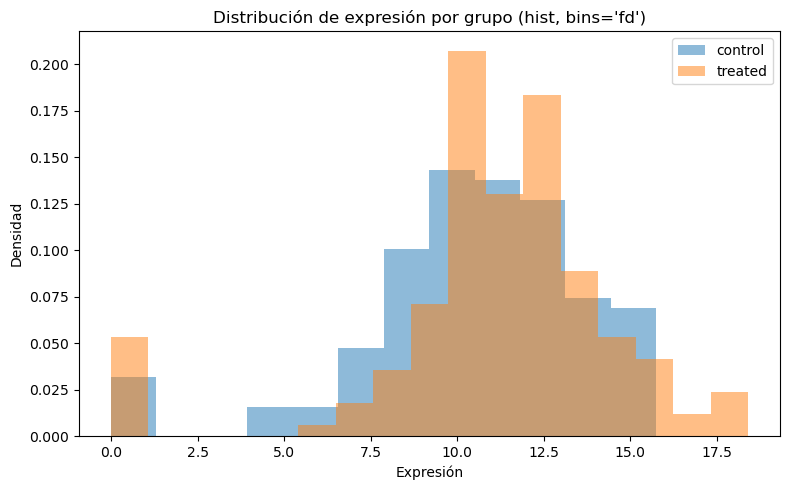

In [3]:
groups = df["group"].dropna().unique()

plt.figure(figsize=(8, 5))
for g in groups:
    x = df.loc[df["group"] == g, "expression"].dropna()
    plt.hist(x, bins="fd", alpha=0.5, density=True, label=str(g))

plt.title("Distribución de expresión por grupo (hist, bins='fd')")
plt.xlabel("Expresión")
plt.ylabel("Densidad")
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\raulo\AppData\Local\Temp\ipykernel_1712\1365484245.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=groups)


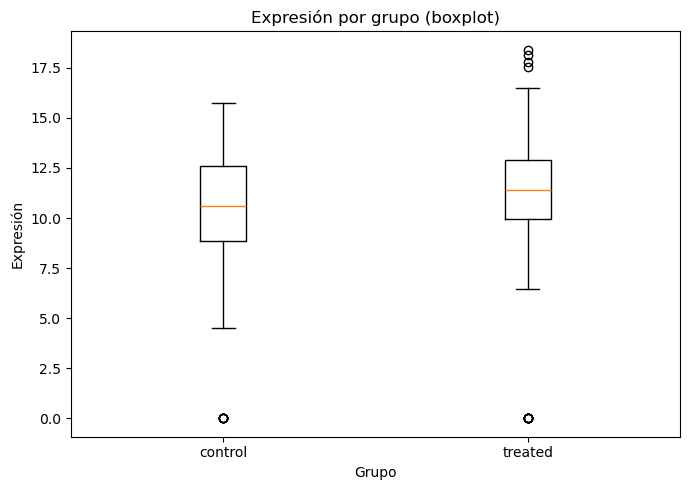

In [4]:
# Boxplot por grupo
plt.figure(figsize=(7, 5))

data = [
    df.loc[df["group"] == g, "expression"]
    for g in groups
]

plt.boxplot(data, labels=groups)
plt.title("Expresión por grupo (boxplot)")
plt.xlabel("Grupo")
plt.ylabel("Expresión")
plt.tight_layout()
plt.show()


Un boxplot resume una distribución mediante cuartiles y valores extremos, permitiendo comparar medianas y dispersión entre grupos sin depender de bins ni suposiciones de forma.

El grupo treated tiene una mediana de expresión mayor que el control, con dispersión comparable y presencia de valores extremos en ambos grupos.

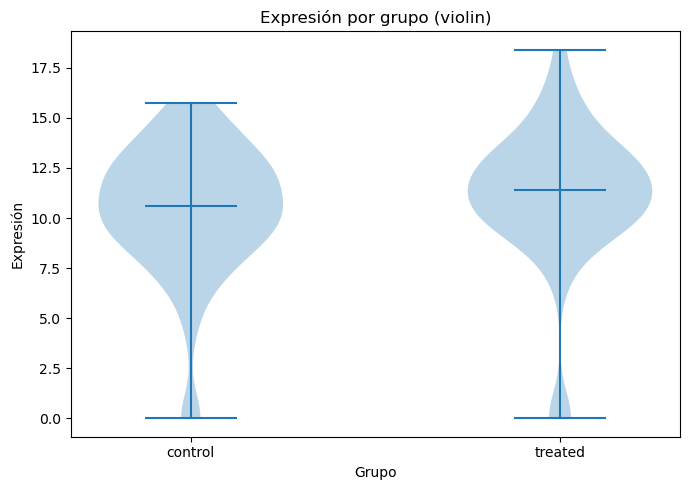

In [5]:
#Violin plot por grupo
plt.figure(figsize=(7, 5))

plt.violinplot(data, showmedians=True)
plt.xticks(range(1, len(groups) + 1), groups)
plt.title("Expresión por grupo (violin)")
plt.xlabel("Grupo")
plt.ylabel("Expresión")
plt.tight_layout()
plt.show()


Los violin plots muestran distribuciones similares entre grupos, con un desplazamiento hacia valores más altos en treated y solapamiento parcial de densidades.

Grupo control

Densidad máxima alrededor de 10–11
Forma relativamente compacta
Cola inferior larga hasta 0 (por los ceros introducidos)
Mediana ≈ 10.5

La mayoría de los valores de control se concentran alrededor de 10–11, con algunos valores bajos poco frecuentes.

Grupo treated

Distribución desplazada hacia arriba
Pico alrededor de 11–12
Cola superior más larga (valores altos)
Mediana ≈ 11–11.5

Treated muestra mayor densidad en valores más altos de expresión y una dispersión algo mayor.

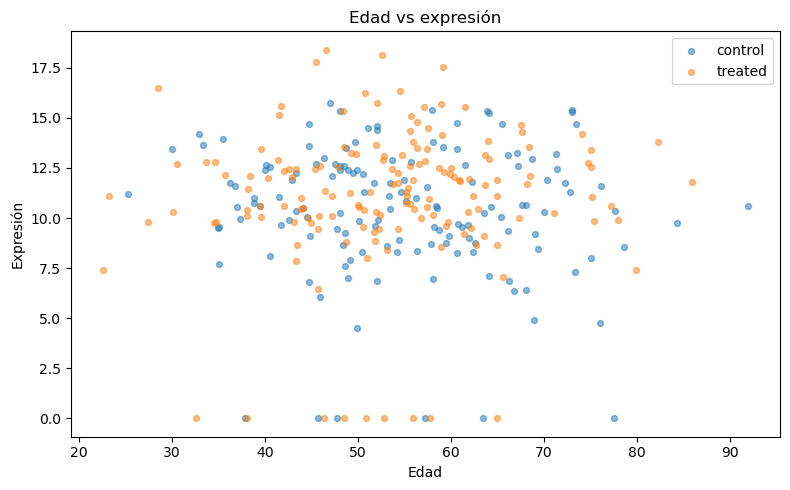

In [6]:
#Scatter edad vs expresión (coloreado por grupo)
plt.figure(figsize=(8, 5))

for g in groups:
    sub = df[df["group"] == g]
    plt.scatter(
        sub["age"],
        sub["expression"],
        alpha=0.5,
        s=18,
        label=g
    )

plt.title("Edad vs expresión")
plt.xlabel("Edad")
plt.ylabel("Expresión")
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\raulo\AppData\Local\Temp\ipykernel_1712\1901002539.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_batch, labels=batches)


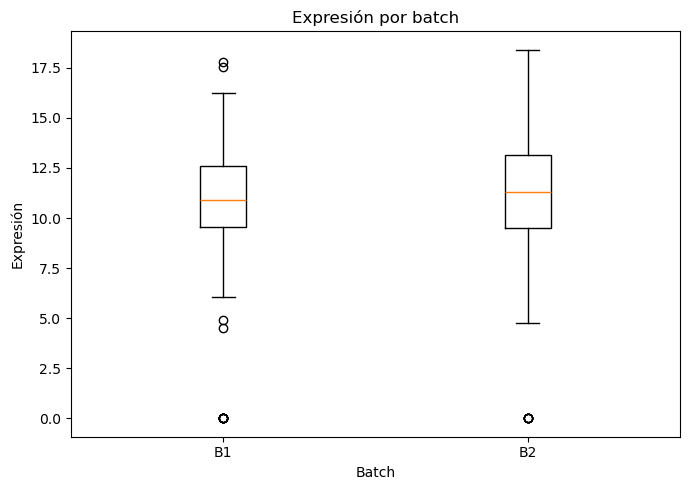

In [7]:
#Comparación de batch (diagnóstico de efecto técnico)
batches = df["batch"].unique()

plt.figure(figsize=(7, 5))

data_batch = [
    df.loc[df["batch"] == b, "expression"]
    for b in batches
]

plt.boxplot(data_batch, labels=batches)
plt.title("Expresión por batch")
plt.xlabel("Batch")
plt.ylabel("Expresión")
plt.tight_layout()
plt.show()


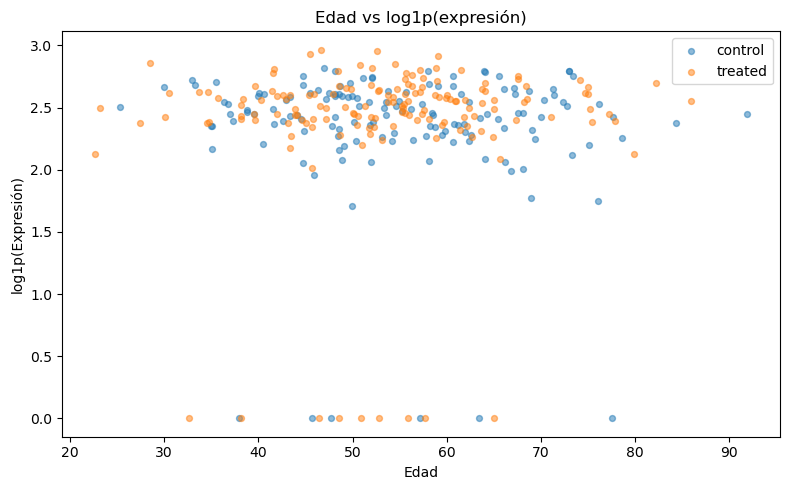

In [8]:
#Eje log (manejo de colas y ceros)
df["log1p_expression"] = np.log1p(df["expression"])

plt.figure(figsize=(8, 5))

for g in groups:
    sub = df[df["group"] == g]
    plt.scatter(
        sub["age"],
        sub["log1p_expression"],
        alpha=0.5,
        s=18,
        label=g
    )

plt.title("Edad vs log1p(expresión)")
plt.xlabel("Edad")
plt.ylabel("log1p(Expresión)")
plt.legend()
plt.tight_layout()
plt.show()
